In [1]:
import pandas as pd
import numpy as np
import datetime as dt


In [2]:
confectionery_data = [
    {"Name": "", "Type":"Confectionery","Avg Menu Items": 40, "Avg Price (£)": 2.5, "Reviews": 163},
    {"Name": "", "Type":"Confectionery","Avg Menu Items": 25, "Avg Price (£)": 3.0, "Reviews": 36},
    {"Name": "", "Type":"Confectionery","Avg Menu Items": 30, "Avg Price (£)": 2.8, "Reviews": 41},
    {"Name": "", "Type":"Confectionery","Avg Menu Items": 50, "Avg Price (£)": 3.5, "Reviews": 41},
    {"Name": "", "Type":"Confectionery","Avg Menu Items": 45, "Avg Price (£)": 3.2, "Reviews": 83},
    {"Name": "", "Type":"Confectionery","Avg Menu Items": 35, "Avg Price (£)": 2.7, "Reviews": 48},
    {"Name": "", "Type":"Confectionery","Avg Menu Items": 20, "Avg Price (£)": 2.2, "Reviews": 3}
]

df_confectionery = pd.DataFrame(confectionery_data)
df_confectionery


,Name,Type,Avg Menu Items,Avg Price (£),Reviews
0,,Confectionery,40,2.5,163
1,,Confectionery,25,3.0,36
2,,Confectionery,30,2.8,41
3,,Confectionery,50,3.5,41
4,,Confectionery,45,3.2,83
5,,Confectionery,35,2.7,48
6,,Confectionery,20,2.2,3


In [3]:
bakery_data = [
    {"Name": "", "Type":"Bakery","Menu Items": 70, "Avg Price (£)": 4.0, "Reviews": 80},
    {"Name": "", "Type":"Bakery","Menu Items": 55, "Avg Price (£)": 3.5, "Reviews": 219},
    {"Name": "", "Type":"Bakery","Menu Items": 65, "Avg Price (£)": 4.2, "Reviews": 14},
    {"Name": "", "Type":"Bakery","Menu Items": 60, "Avg Price (£)": 3.8, "Reviews": 47},
    {"Name": "", "Type":"Bakery","Menu Items": 50, "Avg Price (£)": 4.5, "Reviews": 41},
    {"Name": "", "Type":"Bakery","Menu Items": 80, "Avg Price (£)": 3.9, "Reviews": 203}
]

df_bakeries = pd.DataFrame(bakery_data)
df_bakeries


,Name,Type,Menu Items,Avg Price (£),Reviews
0,,Bakery,70,4.0,80
1,,Bakery,55,3.5,219
2,,Bakery,65,4.2,14
3,,Bakery,60,3.8,47
4,,Bakery,50,4.5,41
5,,Bakery,80,3.9,203


In [4]:
menu_confectionery = {
    "Candy Assortment": {"Price": 3.00},
    "Fudge (100g)": {"Price": 4.50},
    "Handmade Chocolates": {"Price": 5.00},
    "Seasonal Sweet Jar": {"Price": 7.50},
}


In [5]:
menu_bakery = {
    "Bread Loaf": {"Price": 4.00},
    "Croissant": {"Price": 2.80},
    "Tea/Coffee": {"Price": 2.50},
    "Cake Slice": {"Price": 4.50},
    "Sandwich": {"Price": 5.00},
}


In [6]:
def estimate_revenue(avg_price, daily_customers):
    """Simple revenue estimator"""
    return avg_price * daily_customers * 7

# Example for Confectionery
df_confectionery['Weekly Est Revenue (£)'] = df_confectionery['Avg Price (£)'] * 50 * 7  # 50 is average daily customers

# Example for Bakeries
df_bakeries['Weekly Est Revenue (£)'] = df_bakeries['Avg Price (£)'] * 120 * 7  # 120 average daily customers

df_confectionery, df_bakeries


(  Name           Type  Avg Menu Items  Avg Price (£)  Reviews  \
 0       Confectionery              40            2.5      163   
 1       Confectionery              25            3.0       36   
 2       Confectionery              30            2.8       41   
 3       Confectionery              50            3.5       41   
 4       Confectionery              45            3.2       83   
 5       Confectionery              35            2.7       48   
 6       Confectionery              20            2.2        3   
 
    Weekly Est Revenue (£)  
 0                   875.0  
 1                  1050.0  
 2                   980.0  
 3                  1225.0  
 4                  1120.0  
 5                   945.0  
 6                   770.0  ,
   Name    Type  Menu Items  Avg Price (£)  Reviews  Weekly Est Revenue (£)
 0       Bakery          70            4.0       80                  3360.0
 1       Bakery          55            3.5      219                  2940.0
 2       

In [7]:
# Add yearly revenue
df_confectionery['Yearly Revenue (£)'] = df_confectionery['Weekly Est Revenue (£)'] * 52
df_bakeries['Yearly Revenue (£)'] = df_bakeries['Weekly Est Revenue (£)'] * 52

# Estimate profits
df_confectionery['Est Profit (£)'] = df_confectionery['Yearly Revenue (£)'] * 0.1
df_bakeries['Est Profit (£)'] = df_bakeries['Yearly Revenue (£)'] * 0.08

df_confectionery, df_bakeries


(  Name           Type  Avg Menu Items  Avg Price (£)  Reviews  \
 0       Confectionery              40            2.5      163   
 1       Confectionery              25            3.0       36   
 2       Confectionery              30            2.8       41   
 3       Confectionery              50            3.5       41   
 4       Confectionery              45            3.2       83   
 5       Confectionery              35            2.7       48   
 6       Confectionery              20            2.2        3   
 
    Weekly Est Revenue (£)  Yearly Revenue (£)  Est Profit (£)  
 0                   875.0             45500.0          4550.0  
 1                  1050.0             54600.0          5460.0  
 2                   980.0             50960.0          5096.0  
 3                  1225.0             63700.0          6370.0  
 4                  1120.0             58240.0          5824.0  
 5                   945.0             49140.0          4914.0  
 6             

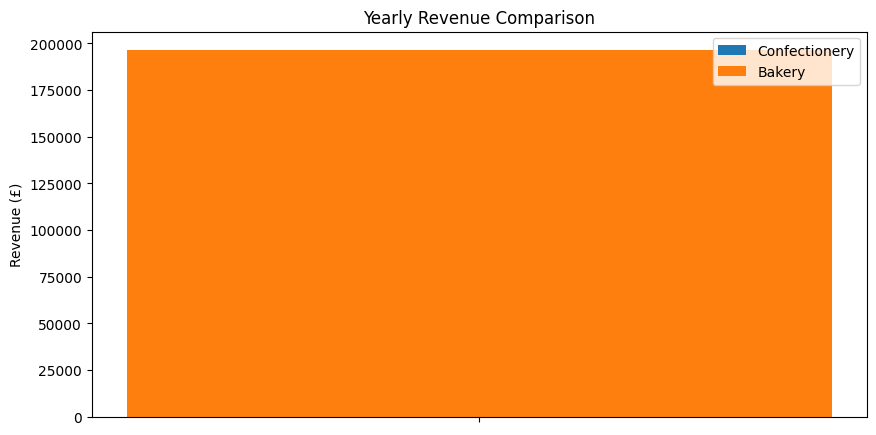

In [8]:
import matplotlib.pyplot as plt

# Revenue comparison
plt.figure(figsize=(10,5))
plt.bar(df_confectionery['Name'], df_confectionery['Yearly Revenue (£)'], label='Confectionery')
plt.bar(df_bakeries['Name'], df_bakeries['Yearly Revenue (£)'], label='Bakery')
plt.xticks(rotation=90)
plt.title("Yearly Revenue Comparison")
plt.ylabel("Revenue (£)")
plt.legend()
plt.show()
